In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

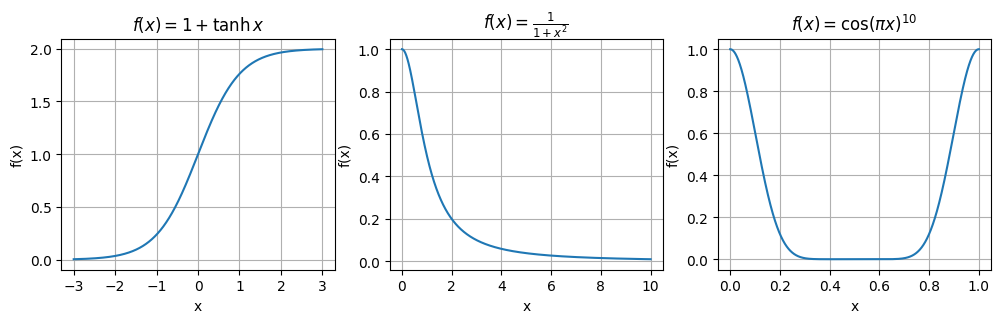

In [8]:
# Funkcje - rysunki
def tanh(x):
    return 1 + np.tanh(x)

def ulamek(x):
    return 1/(1 + x**2)

def cosinus(x):
    return np.cos(np.pi * x)**10

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
fig.subplots_adjust(hspace=0.5)
x = np.linspace(-3, 3, 10000)
ax[0].plot(x, tanh(x))
ax[0].set_title(r'$f(x)=1+ \tanh x$')
ax[0].set_xlabel('x')
ax[0].set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax[0].set_ylabel('f(x)')
ax[0].grid()

x = np.linspace(0, 10, 10000)
ax[1].plot(x, ulamek(x))
ax[1].set_title(r'$f(x) = \frac{1}{1+x^2}$')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
ax[1].grid()

x = np.linspace(0, 1, 10000)
ax[2].plot(x, cosinus(x))
ax[2].set_title(r'$f(x) = \cos(\pi x)^{10}$')
ax[2].set_xlabel('x')
ax[2].set_ylabel('f(x)')
ax[2].grid()

plt.show()

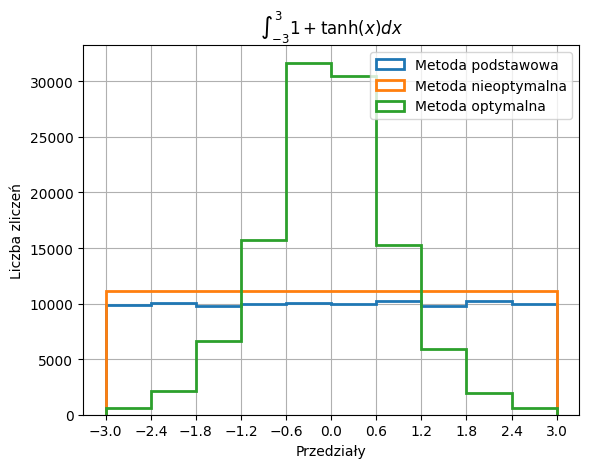

(array([  610,  2143,  6647, 15754, 31676, 30519, 15263,  5874,  1993,
         640]), array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]))


In [35]:
# tanh
# histogram
df1 = pd.read_csv('tanh.txt', header=None)
df2 = pd.read_csv('tanh_los.txt', header=None)
df3 = pd.read_csv('tanh_opt.txt', header=None)

data1 = df1[0]
data2 = df2[0]
data3 = df3[0]

# Tworzenie histogramu
plt.hist(data1, bins=10, range=(-3, 3), linewidth=2, histtype="step")
plt.hist(data2, bins=10, range=(-3, 3), linewidth=2, histtype="step")
plt.hist(data3, bins=10, range=(-3, 3), linewidth=2, histtype="step")
plt.title(r'$\int_{-3}^{3}1+\tanh(x)dx$')
plt.xlabel('Przedziały')
plt.ylabel('Liczba zliczeń')
plt.xticks(np.linspace(-3, 3, 11))
plt.grid()
plt.legend(['Metoda podstawowa', 'Metoda nieoptymalna', 'Metoda optymalna'])
plt.savefig('tanh_histogram.png')
plt.show()

print(np.histogram(data3, bins=10, range=(-3, 3)))


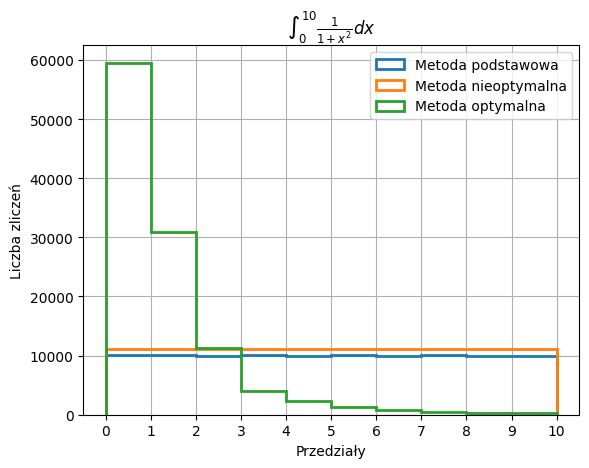

(array([59539, 30953, 11280,  3940,  2331,  1265,   715,   516,   329,
         254]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))


In [36]:
# 1/x
df1 = pd.read_csv('x_2.txt', header=None)
df2 = pd.read_csv('x_2_los.txt', header=None)
df3 = pd.read_csv('x_2_opt.txt', header=None)

data1 = df1[0]
data2 = df2[0]
data3 = df3[0]

# Tworzenie histogramu
plt.hist(data1, bins=10, range=(0, 10), linewidth=2, histtype="step")
plt.hist(data2, bins=10, range=(0, 10), linewidth=2, histtype="step")
plt.hist(data3, bins=10, range=(0, 10), linewidth=2, histtype="step")
plt.title(r'$\int_0^{10}\frac{1}{1+x^2}dx$')
plt.xlabel('Przedziały')
plt.ylabel('Liczba zliczeń')
plt.xticks(np.linspace(0, 10, 11))
plt.grid()
plt.legend(['Metoda podstawowa', 'Metoda nieoptymalna', 'Metoda optymalna'])
plt.savefig('histogram_1_x.png')
plt.show()

print(np.histogram(data3, bins=10, range=(0, 10)))

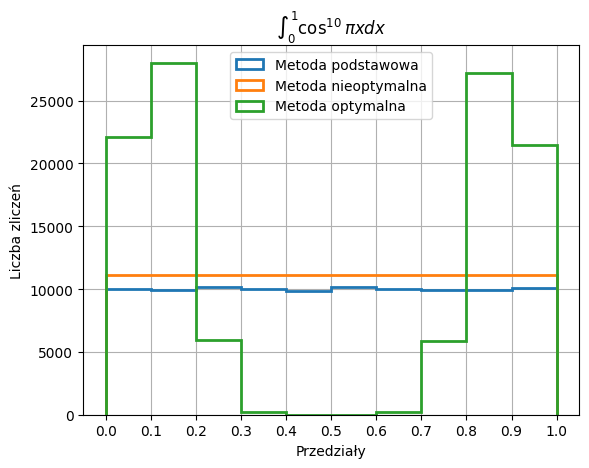

(array([22096, 28018,  5941,   227,     4,     4,   241,  5898, 27193,
       21504]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


In [34]:
# cos

df1 = pd.read_csv('cos.txt', header=None)
df2 = pd.read_csv('cos_los.txt', header=None)
df3 = pd.read_csv('cos_opt.txt', header=None)

data1 = df1[0]
data2 = df2[0]
data3 = df3[0]

# Tworzenie histogramu
plt.hist(data1, bins=10, range=(0, 1), linewidth=2, histtype="step")
plt.hist(data2, bins=10, range=(0, 1), linewidth=2, histtype="step")
plt.hist(data3, bins=10, range=(0, 1), linewidth=2, histtype="step")
plt.title(r'$\int_0^1\cos^{10}{\pi x}dx$')
plt.xlabel('Przedziały')
plt.ylabel('Liczba zliczeń')
plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.legend(['Metoda podstawowa', 'Metoda nieoptymalna', 'Metoda optymalna'])
plt.savefig('histogram_cos.png')
plt.show()

print(np.histogram(data3, bins=10, range=(0, 1)))

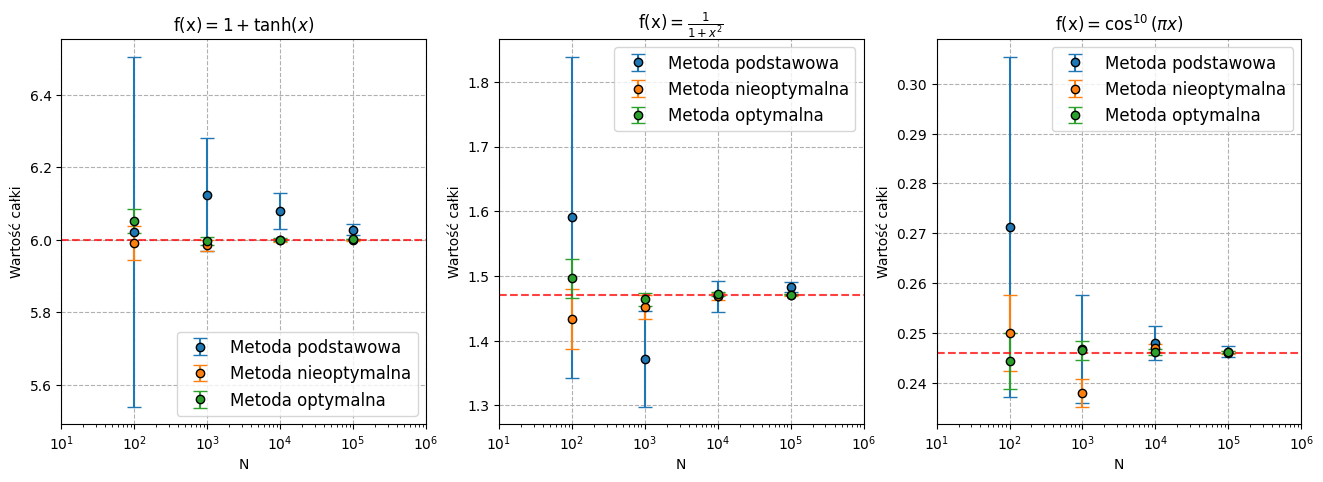

In [26]:
# wykresy
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

values = [6, 1.4711, 0.24609375]
methods = ['Metoda podstawowa', 'Metoda nieoptymalna', 'Metoda optymalna']
names = [r'f(x)$ = 1 + \tanh(x)$', r'f(x)$= \frac{1}{1+x^2}$', r'f(x)$ = \cos^{10}(\pi x)$']

for j, name in enumerate(names):
    for i, method in enumerate(methods):
        df_err = pd.read_csv('stat.txt', skiprows=j * 12 + i * 4, nrows=4, sep=" ", header=None)
        x = [10**k for k in range(2, 6)]
        ax[j].errorbar(x, df_err[1], yerr=df_err[2], mec="k", capthick=True, fmt='o', label=method, capsize=5)
    ax[j].axhline(y=values[j], color='r', linestyle='--', alpha=0.75)
    ax[j].grid(linestyle='--')
    ax[j].set_title(name)
    ax[j].set_xlim(10, 1000000)
    ax[j].set_ylabel("Wartość całki")
    ax[j].set_xlabel('N')
    ax[j].set_xscale('log')
    ax[j].legend(fontsize='large')

fig.savefig('stat.png')
plt.show()